# Data Preparation

This notebook is used to prepare the cleaned data for the model.

## 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## 2. Read cleaned data

In [2]:
df = pd.read_csv('processed/cleaned_data.csv')

## 3. Prepare data for EV-bus charging stations

In [3]:
df.rename(columns={'BusDepot [kWh]': 'EV_charging_station'}, inplace=True)

## 4. Combine all data

In [4]:
df['Local'] = pd.to_datetime(df['Local'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Local', inplace=True)

In [5]:
# Add missing values
df.loc['2021-01-01 00:00:00', :] = df.loc['2021-01-01 00:30:00', :]
df.loc['2021-01-01 00:15:00', :] = df.loc['2021-01-01 00:30:00', :]
df.loc['2021-12-31 23:15:00', :] = df.loc['2021-12-31 23:00:00', :]
df.loc['2021-12-31 23:30:00', :] = df.loc['2021-12-31 23:15:00', :]
df.loc['2021-12-31 23:45:00', :] = df.loc['2021-12-31 23:30:00', :]

In [6]:
df

,Office 1,Office 2,Office 3,Office 4,School,EV_charging_station,Irradiance [W/m^2],T_ambient [Degrees Celsius],T_ground [Degrees Celsius],Wind [m/s],Cloud [okta],Pressure [Pa],Rain [mm/hr],Diffuse [W/m^2],Direct [W/m^2],Elevation [Degrees],Azimuth [Degrees],hh1_consumption [kWh],hh2_consumption [kWh],hh3_consumption [kWh]
Local,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:30:00,9.4,4.8,1.8,18.5,12.336667,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.157249,0.122680,0.384985
2021-01-01 00:45:00,9.4,5.1,1.8,17.0,11.323333,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.154470,0.123942,0.354953
2021-01-01 01:00:00,9.4,4.8,1.7,21.0,11.915000,5.58,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.149123,0.122407,0.323749
2021-01-01 01:15:00,9.6,4.6,1.8,17.5,11.575000,5.58,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.143373,0.121962,0.301651
2021-01-01 01:30:00,8.7,4.6,1.8,20.0,12.170000,5.58,0.0,2949.0,1625.00,6.938,6124.0,101613804.0,0.055,0.0,0.0,-54847.0,45.722,0.142570,0.118858,0.288491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 00:00:00,9.4,4.8,1.8,18.5,12.336667,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.157249,0.122680,0.384985
2021-01-01 00:15:00,9.4,4.8,1.8,18.5,12.336667,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.157249,0.122680,0.384985
2021-12-31 23:15:00,5.1,5.5,1.5,16.0,11.846364,4.74,0.0,3245.0,2038.00,7.448,6514.0,101634525.0,0.054,0.0,0.0,-58117.0,326.722,0.199495,0.945290,0.445335


## 8. Export data

In [7]:
df.to_csv('processed/model_input_data.csv')

---

In [2]:
# read historical climate data

In [12]:
df = pd.read_csv("raw/tas_timeseries_monthly_cru_1901-2021_NLD.csv")

In [13]:
df['Month'] = pd.date_range(start="01/01/2021", periods=12, freq='M').strftime("%B")

In [14]:
df = df.set_index('Month')

In [15]:
df

,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,,,,,,,,,,,
January,-0.69,4.71,2.86,1.00,1.06,3.41,2.06,-0.26,1.05,3.64,...,4.58,1.97,5.24,3.87,4.25,1.42,5.40,3.18,5.95,2.96
February,-1.23,0.24,5.64,3.02,3.54,2.48,0.75,3.70,0.61,4.40,...,0.43,1.38,6.35,3.29,4.56,4.96,0.54,6.41,6.86,4.10
March,3.67,5.46,7.40,4.10,6.25,4.25,5.04,3.93,3.25,5.65,...,8.33,2.15,8.56,6.41,5.42,8.78,4.46,8.06,6.91,6.65
April,8.72,8.24,5.30,9.26,6.44,7.82,7.42,6.11,8.45,7.85,...,8.06,7.96,11.55,8.89,8.24,8.22,11.88,10.34,11.05,6.54
May,12.29,8.95,12.76,12.36,12.02,12.81,12.66,13.11,11.30,12.59,...,13.98,11.26,13.08,12.21,14.16,14.70,16.00,11.47,12.95,11.02
June,15.00,15.07,14.20,14.43,16.74,14.24,13.89,16.15,13.22,16.35,...,14.66,14.89,15.94,15.38,16.23,17.67,17.18,18.19,17.09,17.98
July,18.54,15.52,16.09,18.33,18.11,16.93,14.31,16.89,14.88,15.58,...,17.04,19.13,19.46,18.42,18.25,18.06,20.71,18.89,17.11,17.98
August,16.91,14.85,15.47,16.58,16.44,17.13,15.81,15.32,16.44,16.52,...,18.73,18.29,16.24,18.90,18.07,17.62,19.12,19.01,20.58,16.93
September,14.15,12.72,14.25,12.46,13.09,13.98,14.04,13.60,13.22,13.54,...,14.14,14.24,15.95,13.36,17.58,13.80,15.16,14.71,15.51,16.03


In [16]:
# slice number of years for plotting
years = ['2000', '2001', '2002', '2003', '2004', '2005',
         '2006', '2007', '2008', '2009', '2010', '2011',
         '2012', '2013','2014', '2015', '2016', '2017',
         '2018', '2019', '2020', ]

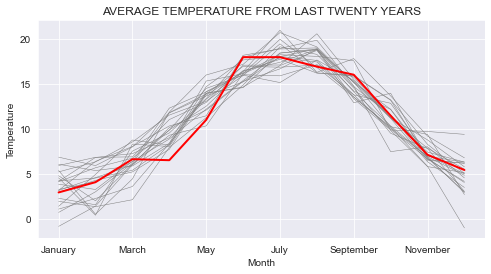

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
df[years].plot(ax=ax, legend=False, color='#808080', linewidth=0.5)
df['2021'].plot(ax=ax, legend=False, color='#ff0000', linewidth=2)
ax.set_ylabel('Temperature')
ax.set_title('Average temperature from last twenty years'.upper())
plt.savefig("../images/temperature_variation_five_years.png", dpi=300)